![alt text](sparks.png "Title")
# Graduate Rotational Internship Program 
# TASK-3

## To explore Decision Tree Algorithm

### Decision Tree Algorithm

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically. The purpose is if we feed any new data to this
classifier, it would be able to predict the right class accordingly.

## 1.Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics

## 2.Importing and Exploring Dataset

In [2]:
df = pd.read_csv("Iris.csv")
print('Number of rows and columns is the dataset is:',df.shape)
df.head(10)

Number of rows and columns is the dataset is: (150, 6)


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [3]:
df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


#### Understanding the Dataset
   The dataset consist of 5 columns: Id, Sepal length, Sepal Width, Petal length, Petal Width and Species the flower belong to. Since it's clustering model we are not worried about the Species column, we have to segment the flowers based on the 4 attributes. 

##  3.Converting the variable data to numerical data (Label Encoder)

Encoding the target column with numbers using the Label Encoder

In [6]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [7]:
df.iloc[:,-1] = lb.fit_transform(df.iloc[:,-1])
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [34]:
print("Dependent Variables:", df.columns[1:-1])
print("Target Variable:", df.columns[-1])

Dependent Variables: Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], dtype='object')
Target Variable: Species


In [23]:
from sklearn.model_selection import train_test_split
X = df.iloc[:,1:-1].values
y = df.iloc[:,-1].values

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)
print("X_train shape",X_train.shape)
print("X_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

X_train shape (120, 4)
X_test shape (30, 4)
y_train shape (120,)
y_test shape (30,)


### 4.Decision Tree 

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#### To predict the best depth 

In [26]:
acc_matrix=[]
for depth in range (2,10):
    dt = DecisionTreeClassifier(criterion='gini',random_state=0 ,max_depth=depth)
    dt.fit(X_train,y_train)
    y_pred = dt.predict(X_test)
    b = [accuracy_score(y_test,y_pred),depth]
    acc_matrix.append(b)
print(acc_matrix)    

[[0.9666666666666667, 2], [0.9666666666666667, 3], [1.0, 4], [1.0, 5], [1.0, 6], [1.0, 7], [1.0, 8], [1.0, 9]]


When the tree depth reaches 5 we obtain high accuracy (100%).

In [36]:
dt = DecisionTreeClassifier(criterion="gini",random_state=0,max_depth=5)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print("Test data:",y_test)
print("Predicted values:",y_pred)

Test data: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]
Predicted values: [2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


#### Confusion Matrix

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

### 5.Visualizing the Decision Tree 

In [29]:
dt.fit(X,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [30]:
!pip install pydotplus
!apt-get install graphviz -y

'apt-get' is not recognized as an internal or external command,
operable program or batch file.


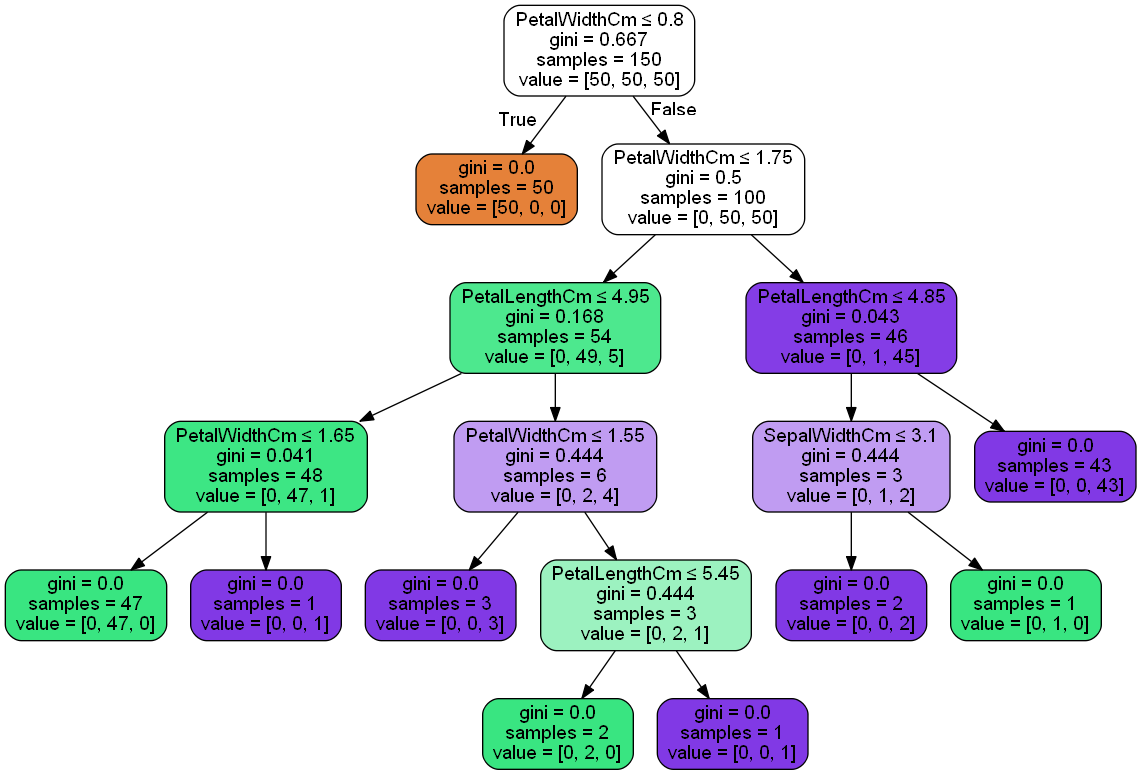

In [32]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=df.columns[1:-1],  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())